# Introducción a las ciencias de la computación *y programación en Python*

*Banco de Guatemala*  
*PES 2025-2026*  
*Programación I*  
*Septiembre de 2025*  

## Abstract

> "*Simple is better than complex. Complex is better than complicated.*" **Zen of Python, Tim Peters**

- Entendiendo la eficiencia de un programa.  
    - Orden de complejidad de un algoritmo.  
    - Notación ***Big O***.
    - Clases de complejidad.

## ¿Por qué entender la eficiencia de los programas?

- Las computadoras son cada vez más rápidas, ¿quizás no es tan importante?.

    - Pero los conjuntos de datos pueden ser muy grandes.

    - En 2014, Google atendió más de 30,000,000,000,000 de páginas en sus registros de más de 100,000,000 GB. ¿Cuánto podría tomar la búsqueda por fuerza bruta?

    - Se estima que para 2020, cada persona en la tierra genera alrededor de 1.7MB por segundo, esto es más de un zettabyte (1000 millones de terabytes) de datos cada día.

    - Quizás las soluciones más simples pueden no funcionar al escalarse.
    
- ¿Cómo se puede decidir qué opción para un programa es la más eficiente?

- *Tradeoff* entre tiempo y espacio para lograr la eficiencia:

    - A veces podemos precomputar resultados y luego buscarlos (ejemplo de Fibonacci con diccionarios).

    - A veces nos enfocamos más optimizar el tiempo, el espacio podría no ser un problema.

## ¿Por qué entender la eficiencia de los programas?

- Un programa puede ser implementado de **muchas formas diferentes**.

- Es posible resolver un problema utilizando **algoritmos diferentes**.

- Queremos separar las elecciones de implementación (e.g. computadora, lenguaje, ciclos, funciones) de las elecciones del algoritmo abstracto.

# ¿Cómo evaluar la eficiencia de los programas?

- Medir el tiempo de ejecución con un **temporizador**.

- **Contar** el número de operaciones.

- Noción abstracta del **orden de crecimiento** del algoritmo. 

    - Esta es la forma más apropiada de evaluar el impacto de las elecciones de un algoritmo en la solución de un problema. 

    - Permite medir la dificultad inherente en resolver un problema.

## Medir el tiempo de un programa

- Podemos utilizar el módulo `time`. 

- Iniciamos el *cronómetro*, ejecutamos código y luego detenemos el cronómetro.

In [ ]:
import time

def complicated_op():
    for i in range(100000):
        pass
    print('Done')

t0 = time.time()
complicated_op()
t1 = time.time()

print("t = %0.10f" % (t1-t0))

In [ ]:
%%time 
complicated_op()

## Medir el tiempo de un programa **es inconsistente**

Meta: evaluar diferentes algoritmos.
> - Tiempo varía entre diferentes algoritmos, **¡bien!**
- Tiempo varía entre diferentes implementaciones, **¡mal!**
- Tiempo varía entre diferentes computadoras, **¡mal!**
- El tiempo **no es predecible**, **¡terrible!**.


- En general, aunque el tiempo varía para diferentes entradas, **no podemos expresar una relación entre las entradas y el tiempo**.

## Conteo de operaciones

- Si asumismos que los pasos del algoritmo toman tiempo constante, contamos:
    - Operaciones matemáticas
    - Comparaciones
    - Asignaciones
    - Accesos a objetos en memoria.
    
- Contamos el número de operaciones y las expresamos en función del **tamaño de la entrada**.

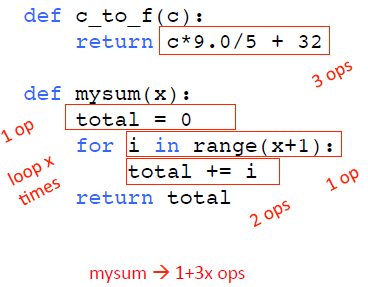

## Contar operaciones es mejor

Meta: evaluar diferentes algoritmos.

> - Contar operaciones varía entre diferentes algoritmos, **¡bien!**

- Contar operaciones varía entre diferentes implementaciones, **¡mal!**

- Contar operaciones varía entre diferentes computadoras, **¡mal!**

- **Problema:** no está claro **cuáles operaciones** contar, **¡mal!**.


- En general, el conteo de operaciones varía para diferentes entradas, **quizás podemos obtener una relación**.

## Pero necesitamos una mejor forma

* El conteo de tiempo y operaciones **evalúa implementaciones**.

- El conteo de tiempo aún **evalúa máquinas**.

- Queremos separar y evaluar los **algoritmos**.
    - Escalabilidad
    - Evaluar en términos del **tamaño de la entrada**

## Pero necesitamos una mejor forma

- Vamos a enfocarnos en contar operaciones, *sin preocuparnos de pequeñas variaciones* en la implementación.

- Nos enfocamos en cómo se comporta el algoritmo conforme el problema **se vuelve arbitrariamente grande**.

- Queremos una relación entre:

> El tiempo requerido para realizar un cómputo vs. el tamaño de la entrada del problema.

- **Necesitamos decidir qué medir**.

## Qué entrada escoger para evaluar una función

- Queremos expresar la eficiencia en **términos del tamaño de la entrada**. Para esto necesitamos decidir cuál es la entrada.

- Podría ser un **entero**: `mysum(x)`

- Podría ser el **largo de una lista**: `list_sum(L)`

- Si la función recibe varios parámetros, decidir con base en uno crítico: `search_for_elmt(L, e)`

## Diferentes entradas afectan cómo corre el programa

- Pensemos en una función que busca un elemento en una lista:

In [ ]:
def search_for_elmt(L, e):
    for i in L:
        if i == e:
            return True
    return False

- Cuando `e` es el primer elemento: **mejor caso**.
    - mínimo tiempo de ejecución para cualquier entrada.
    - tiempo prácticamente constante.  

- Buscar más o menos en la mitad de los elementos: **caso promedio**.
    - tiempo lineal en el largo de la lista `L`.
    - se busca en toda la lista y no se encuentra `e`.

- **Nos enfocamos en el peor caso:** cuando `e` no está en la lista.
    - tiempo promedio para cualquier posible entrada.
    - medida práctica.

# Orden de crecimiento

- Queremos evaluar la eficiencia de un programa cuando **la entrada es muy grande**.

- Relación entre el **tiempo de ejecución** vs. el tamaño de la entrada.

- **Cota superior** en el crecimiento como función del tamaño de la entrada, en el peor escenario.

- No necesitamos ser precisos: queremos el "orden" de crecimiento.

- Veremos los factores más grandes en la ejecución: **¿qué sección tarda más en ejecutarse?**

## Notación Big O

- Describe una **cota superior en el crecimiento asintótico** de un algoritmo: orden de crecimiento.

- Describe el peor de los casos.

- Expresa la tasa de crecimiento del programa, relativa al tamaño de la entrada.

- Evalúa el algoritmo y **no** su implementación en una máquina.

## Pasos exactos vs notación O

- La siguiente función computa el factorial. 

In [ ]:
def fact_iter(n):
    """assumes n an int >= 0"""
    answer = 1
    while n > 1:
        answer *= n
        n -= 1
    return answer

- Se considera el número de pasos: $1 + 5n + 1$
- El peor caso asintótico: $O(n)$
    - Ignoramos las constantes aditivas y multiplicativas: queremos la relación general de tiempo requerido vs. tamaño de la entrada.
    - Nos enfocamos en los **términos dominantes** de la expresión: los términos que crecen más rápidamente en la suma.

## Ejemplos de simplificación

- Ignoramos las constantes aditivas: no crecen conforme $n$.
- Ignoramos las constantes multiplicativas: relación general tiempo vs. $n$.

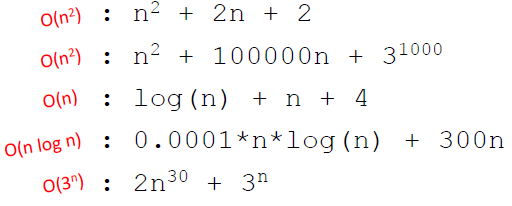

## Tipos de órdenes de crecimiento

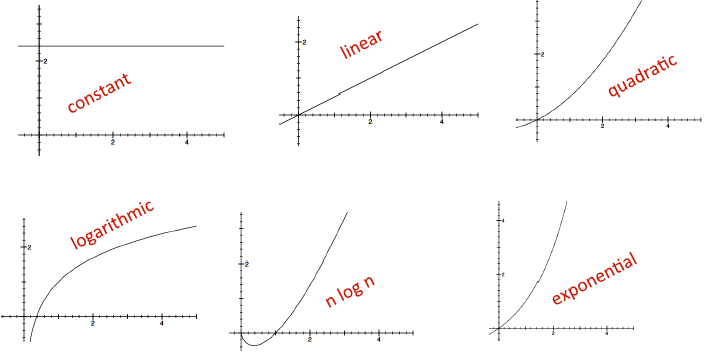

## Reglas de combinación

- **Ley de adición** para $O(\cdot)$: 
  $$ O(f(n) + g(n)) = O(f(n)) + O(g(n)) $$
    - Al utilizar instrucciones **secuenciales**.
    - Por ejemplo:

In [ ]:
n = 10
for i in range(n):
    print('a')
for j in range(n * n): 
    print('b')

tiene complejidad $O(n) + O(n*n) = O(n + n^2) = O(n^2)$ por el término dominante del **segundo ciclo for**.

## Reglas de combinación

- **Ley de multiplicación** para $O(\cdot)$: $$ O(f(n) * g(n)) = O(f(n)) * O(g(n)) $$
    - Al utilizar instrucciones o ciclos **anidados**.
    - Por ejemplo:

In [ ]:
for i in range(n):
    for j in range(n):
        print('a')

tiene complejidad $O(n) * O(n) = O(n*n) = O(n^2)$ porque cada ciclo exterior ejecuta $n$ veces el ciclo interior.

## Clases de complejidad

- $O(1)$ denota tiempo de ejecución **constante**.

- $O(log(n))$ - **logarítmico**.

- $O(n)$ - **lineal**.

- $O(n\log n)$ - **log-lineal**.

- $O(n^c)$ tiempo **polinomial** ($c$ es constante).

- $O(c^n)$ tiempo **exponencial** ($c$ es constante).

## Clases de complejidad ordenadas de menor a mayor

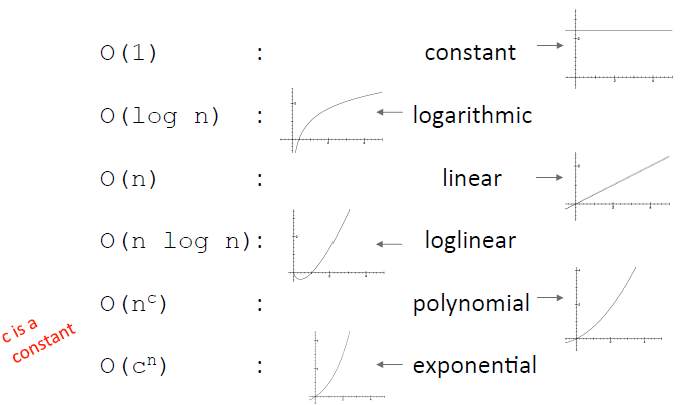

## Crecimiento de la complejidad

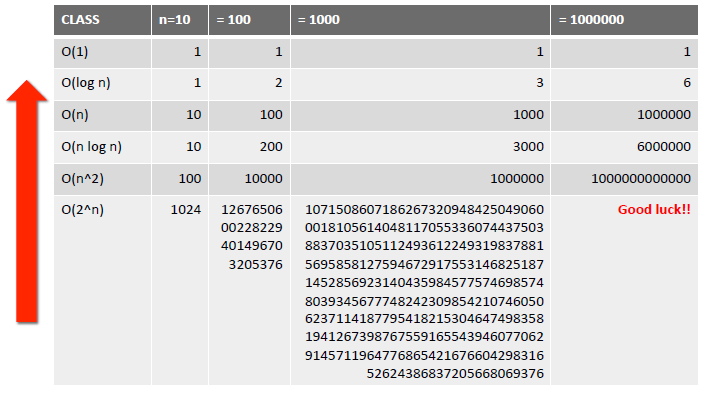

# Complejidad lineal

- Algoritmos iterativos simples son típicamente lineales en complejidad.

- Por ejemplo: la búsqueda lineal en una lista **desordenada**

In [ ]:
def linear_search(L, e):
    found = False
    for i in range(len(L)):
        if e == L[i]:
            found = True
    return found

- Se debe buscar a través de todos los elementos para decidir que el elemento está ausente.

- $O(\text{len}(L))$ para el ciclo $\times O(1)$ para determinar `if e == L[i]` 
- Complejidad general: $O(n)$, donde $n = \text{L}$.

## Complejidad lineal

- Añadir caracteres a una cadena, en donde cada caracter es un dígito.

In [ ]:
def addDigits(s):
    val = 0
    for c in s:
        val += int(c)
    return val

print(addDigits('123'))

- Complejidad $O(\text{len}(s))$

## Complejidad lineal

- Complejidad depende del número de iteraciones usualmente.

In [ ]:
def fact_iter(n):
    prod = 1
    for i in range(1, n+1):
        prod *= i
    return prod

fact_iter(5)

- Complejidad $O(n)$

## $O()$ del factorial recursivo

In [ ]:
def fact_recur(n):
    """ assume n >= 0 """
    if n <= 1: 
        return 1
    else: 
        return n * fact_recur(n - 1)

- Al cronometrar, podría ejecutarse más lento debido a las llamadas a funciones.

- Aún tiene complejidad $O(n)$, porque las llamadas son lineales en $n$ y las llamadas tienen complejidad constante.

- Implementaciones **iterativas** y **recursivas** tienen el mismo orden de crecimiento.

In [ ]:
import time

t0 = time.time()
fact_recur(2000)
t1 = time.time()
print("Recursivo: t = %0.10f" % (t1-t0))

t0 = time.time()
fact_iter(2000)
t1 = time.time()
print("Iterativo: t = %0.10f" % (t1-t0))

# Complejidad cuadrática

- Los ciclos simples son lineales en complejidad. 

- Los ciclos anidados generalmente representan algoritmos de **complejidad cuadrática**.

In [ ]:
def isSubset(L1, L2):
    for e1 in L1:
        matched = False
        for e2 in L2:
            if e1 == e2:
                matched = True
                break
        if not matched:
            return False
    return True

- El ciclo exterior se ejecuta $\text{len}(L1)$ y el ciclo interior hasta $\text{len}(L2)$. 

- Tenemos: $O(\text{len}(L1) * \text{len}(L2))$. 

- En el peor caso $\text{len}(L1) = \text{len}(L2)$ y tenemos $O(\text{len}(L1)^2)$

- [Ver en Python Tutor](http://pythontutor.com/visualize.html#code=def%20isSubset%28L1,%20L2%29%3A%0A%20%20%20%20for%20e1%20in%20L1%3A%0A%20%20%20%20%20%20%20%20matched%20%3D%20False%0A%20%20%20%20%20%20%20%20for%20e2%20in%20L2%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20e1%20%3D%3D%20e2%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20matched%20%3D%20True%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20break%0A%20%20%20%20%20%20%20%20if%20not%20matched%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20False%0A%20%20%20%20return%20True%0A%20%20%20%20%0AisSubset%28%5B1,2%5D,%20%5B1,2,3%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## Complejidad cuadrática

- Recordemos nuestro ejercicio de encontrar números primos de 2 a $n$.

In [ ]:
n = 10
primos = []
for i in range(2, n+1):
    # Revisamos si cada i es primo
    esPrimo = True
    for j in range(2, i):
        if i % j == 0:
            esPrimo = False
            break
    # Si es primo, lo guardamos
    if esPrimo:
        primos.append(i)

primos

- El ciclo exterior se ejecuta $n-1$ veces y el ciclo interior de 2 a $i$. 

- Conforme $n$ crece asintóticamente, el producto de las longitudes en los ciclos es cada vez mayor.

- Por lo tanto, se considera de complejidad cuadrática también, es decir, $O(n^2)$.

# Otro ejemplo: Búsqueda binaria (bisección)

- Con una **lista ordenada**:  


1. Escogemos un índice `i` que divide la lista a la mitad.

2. Revisamos si `L[i] == e`:

3. Si no, revisamos si `L[i]` es mayor o menor que `e`

4. Dependiendo de la respuesta, buscamos a la izquierda o derecha de `L`.  

- Aproximación de **divide y conquista**.

    - Obtenemos una versión más pequeña del problema.

## Búsqueda binaria (bisección)

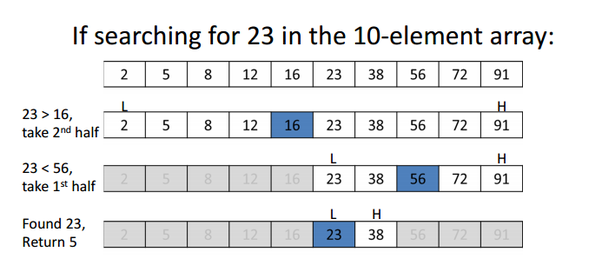

- En cada paso, ¡la lista se divide a la mitad! 

- Terminamos de ver la lista cuando $n/2^i = 1$, es decir, $i = \log_{2} n$.

- Complejidad del problema es $O(\log n)$, donde $n = \text{len}(L)$.

## Implementación 1

In [ ]:
def bisect_search1(L, e):
    # Si L es vacía
    if L == []:
        return False
    # Si L es de largo 1
    elif len(L) == 1:
        return L[0] == e
    else:
        # Encontramos el "centro" de la lista
        half = len(L)//2
        
        # Si el valor del centro es mayor a e
        if L[half] > e:
            # Búsqueda en la parte superior
            return bisect_search1( L[:half], e)
        else:
            # Búsqueda en la parte inferior
            return bisect_search1( L[half:], e)

In [ ]:
L = [1, 3, 4, 5, 7, 11, 15, 20]
bisect_search1(L, 2)

- [Ver en Python Tutor](http://pythontutor.com/visualize.html#code=def%20bisect_search1%28L,%20e%29%3A%0A%20%20%20%20%23%20Si%20L%20es%20vac%C3%ADa%0A%20%20%20%20if%20L%20%3D%3D%20%5B%5D%3A%0A%20%20%20%20%20%20%20%20return%20False%0A%20%20%20%20%23%20Si%20L%20es%20de%20largo%201%0A%20%20%20%20elif%20len%28L%29%20%3D%3D%201%3A%0A%20%20%20%20%20%20%20%20return%20L%5B0%5D%20%3D%3D%20e%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%23%20Encontramos%20el%20%22centro%22%20de%20la%20lista%0A%20%20%20%20%20%20%20%20half%20%3D%20len%28L%29//2%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%23%20Si%20el%20valor%20del%20centro%20es%20mayor%20a%20e%0A%20%20%20%20%20%20%20%20if%20L%5Bhalf%5D%20%3E%20e%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%23%20B%C3%BAsqueda%20en%20la%20parte%20superior%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20bisect_search1%28%20L%5B%3Ahalf%5D,%20e%29%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%23%20B%C3%BAsqueda%20en%20la%20parte%20inferior%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20bisect_search1%28%20L%5Bhalf%3A%5D,%20e%29%0A%0AL%20%3D%20%5B1,%203,%204,%205,%207,%2011,%2015,%2020%5D%0Abisect_search1%28L,%202%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## Implementación 1

- Complejidad $O(\log n)$ para cada llamada a bisección.
    - La lista se divide a la mitad en cada llamada.
    
- Complejidad $O(n)$ para copiar la lista en cada llamada.
    - Resulta que el costo de copiar la lista es $O(n)$ al llamar a la función nuevamente.
    
- En general, $O(\log n)*O(n) = O(n\log n)$

## Implementación 2

- Veamos otra implementación más eficiente

- Evitamos copiar la lista en cada llamada.

- Para esto, llevamos registro de los índices del rango en el cual vamos a buscar.
    - Ingenioso, ¿verdad?
    
    
- La complejidad de la recursión seguirá siendo $O(\log n)$, donde $n = \text{L}$.

## Implementación 2

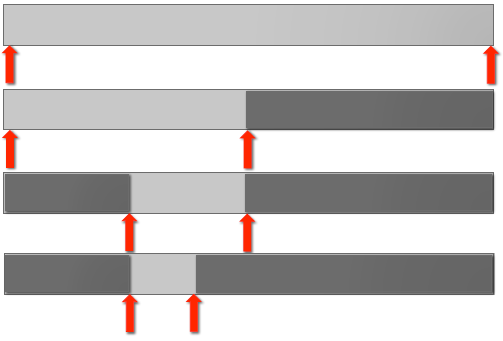

- Aún reduce el tamaño del problema en un factor de 2 en cada paso.

- Pero solamente se lleva registro de qué índices `low` y `high` se deben revisar para **evitar** copiar la lista.

- Complejidad de la recursión es nuevamente $O(\log n)$, donde $n=\text{len}(L)$.

## Implementación 2

In [ ]:
def bisect_search2(L, e):

    # Función de apoyo
    def bisect_search_helper(L, e, low, high):
        # Si llegamos al centro de la lista devolvemos el elemento
        if high == low:
            return L[low] == e

        # Valor central de la lista
        mid = (low + high)//2
        if L[mid] == e:
            return True
        elif L[mid] > e:
            if low == mid: #nothing left to search
                return False
            else:
                return bisect_search_helper(L, e, low, mid - 1)
        else:
            return bisect_search_helper(L, e, mid + 1, high)
    
    # Cuerpo de la función
    if len(L) == 0:
        return False
    else:
        return bisect_search_helper(L, e, 0, len(L) - 1)

- [Ver en Python Tutor](http://pythontutor.com/visualize.html#code=def%20bisect_search2%28L,%20e%29%3A%0A%20%20%20%20def%20bisect_search_helper%28L,%20e,%20low,%20high%29%3A%0A%20%20%20%20%20%20%20%20if%20high%20%3D%3D%20low%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20L%5Blow%5D%20%3D%3D%20e%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20mid%20%3D%20%28low%20%2B%20high%29//2%0A%20%20%20%20%20%20%20%20if%20L%5Bmid%5D%20%3D%3D%20e%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20True%0A%20%20%20%20%20%20%20%20elif%20L%5Bmid%5D%20%3E%20e%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20low%20%3D%3D%20mid%3A%20%23nothing%20left%20to%20search%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20return%20False%0A%20%20%20%20%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20return%20bisect_search_helper%28L,%20e,%20low,%20mid%20-%201%29%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20bisect_search_helper%28L,%20e,%20mid%20%2B%201,%20high%29%0A%20%20%20%20%0A%20%20%20%20%23%20Cuerpo%20de%20la%20funci%C3%B3n%0A%20%20%20%20if%20len%28L%29%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%20False%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20bisect_search_helper%28L,%20e,%200,%20len%28L%29%20-%201%29%0A%0AL%20%3D%20%5B1,%203,%204,%205,%207,%2011,%2015,%2020%5D%0Abisect_search2%28L,%202%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

## Implementación 2

- Al utilizar la función `helper` evitamos la copia.
    - Pasamos índices `low` y `high` en cada llamada.

- Como la lista no se copia, se pasa por "referencia" hacia las llamadas sucesivas tenemos $O(1)$ en las nuevas llamadas.

- Ahora $O(\log n)*O(1) = O(\log n)$

# Complejidad logarítmica

- Solo observamos el ciclo, ya que no hay llamadas a funciones.

- ¿Cuántas veces se puede dividir $i$ por $10$?

- Complejidad $O(\log i)$

In [ ]:
def intToStr(i):
    digits = '0123456789'
    if i == 0:
        return '0'
    
    result = ''
    while i > 0:
        result = digits[i%10] + result
        i = i//10
    return result

In [ ]:
intToStr(1434)

# Complejidad exponencial

## Complejidad de las torres de Hanoi

- El número de pasos para resolver una torre de $n$ discos es $T_n$, donde $$T_n = 2T_{n-1} + 1$$
    
    - Basta con ver los pasos con 2 y 3 discos para ver por qué.
    
- Al iterar hacia atrás: 
$$ \begin{aligned}
T_n = & 2T_{n-1} + 1\\
= &  2(2T_{n-2} + 1) + 1 \\
= &  4T_{n-2} + 2 + 1 \\
= &  4(T_{n-3} + 1) + 2 + 1 \\
= &  8T_{n-3} + 4 + 2 + 1 \\
= &  \vdots \\
= &  2^k T_{n-k} + 2^{k-1} + \ldots + 4 + 2 + 1 \\
= &  2^{n-1}T_1 + 2^{n-2} + \ldots + 4 + 2 + 1 \\
= &  2^{n} - 1 \\
\end{aligned} 
$$

- Por lo tanto, el orden de crecimiento de este algoritmo es $O(2^n)$.


## Complejidad de las torres de Hanoi

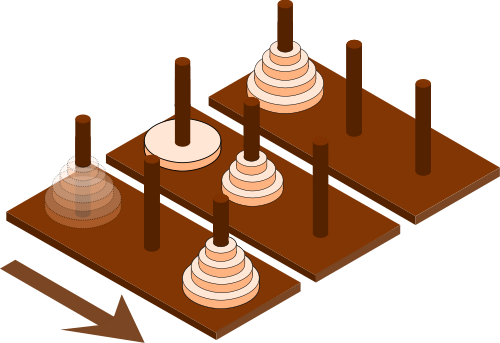


# Complejidad exponencial

- Dado un conjunto de enteros, queremos generar el **conjunto potencia**:

- El conjunto $\{1,2,3,4\}$ generaría 
  $$\{\},\{1\},\{2\},\{3\},\{4\},\{1,2\},\{1,3\},\{1,4\},\{2,3\},\{2,4\},\{3,4\},
\{1,2,3\},\{1,2,4\},\{1,3,4\},\{2,3,4\},\{1,2,3,4\}$$

- **Descripción recursiva**: conjunto potencia de $n$ elementos es la unión del potencia del conjunto con $n-1$ elementos al incluir elemento $n$ y al excluir al elemento $n$.

- Complejidad $O(2^n)$.

In [ ]:
def genSubsets(L):
    # Conjunto potencia del conjunto vacío
    if len(L) == 0:
        return [[]] 
    
    # Generar todos los conjuntos sin el último elemento
    smaller = genSubsets(L[:-1]) 
    
    # Crear una lista con el último elemento
    extra = L[-1:] 
    new = []
    
    # Para cada conjunto del conjunto más pequeño
    for small in smaller:
        # Agregar a las soluciones pequeñas  
        # el último elemento
        new.append(small+extra) 
    
    # Combinar conjuntos con y sin último elemento
    return smaller + new 

In [ ]:
genSubsets([1,2,3])

[Ver en Python Tutor](http://pythontutor.com/visualize.html#code=def%20genSubsets%28L%29%3A%0A%20%20%20%20%23%20Conjunto%20potencia%20del%20conjunto%20vac%C3%ADo%0A%20%20%20%20if%20len%28L%29%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%20%5B%5B%5D%5D%20%0A%20%20%20%20%0A%20%20%20%20%23%20Generar%20todos%20los%20conjuntos%20sin%20el%20%C3%BAltimo%20elemento%0A%20%20%20%20smaller%20%3D%20genSubsets%28L%5B%3A-1%5D%29%20%0A%20%20%20%20%0A%20%20%20%20%23%20Crear%20una%20lista%20con%20el%20%C3%BAltimo%20elemento%0A%20%20%20%20extra%20%3D%20L%5B-1%3A%5D%20%0A%20%20%20%20new%20%3D%20%5B%5D%0A%20%20%20%20%0A%20%20%20%20%23%20Para%20cada%20conjunto%20del%20conjunto%20m%C3%A1s%20peque%C3%B1o%0A%20%20%20%20for%20small%20in%20smaller%3A%0A%20%20%20%20%20%20%20%20%23%20Agregar%20a%20las%20soluciones%20peque%C3%B1as%20%20%0A%20%20%20%20%20%20%20%20%23%20el%20%C3%BAltimo%20elemento%0A%20%20%20%20%20%20%20%20new.append%28small%2Bextra%29%20%0A%20%20%20%20%0A%20%20%20%20%23%20Combinar%20conjuntos%20con%20y%20sin%20%C3%BAltimo%20elemento%0A%20%20%20%20return%20smaller%20%2B%20new%20%0A%0AgenSubsets%28%5B1%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

# P versus NP

![](figs/complexity/p-vs-np.png)

- Tomemos un momento para descansar y ver este video: https://www.youtube.com/watch?v=UR2oDYZ-Sao

# FIN

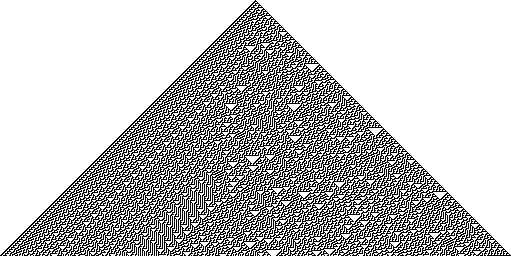

[La regla 30 de Stephen Wolfram](https://en.wikipedia.org/wiki/Rule_30)